# Spring-Mass System: Harmonic Motion and Damped Oscillations

## Introduction

The spring-mass system is a fundamental model in classical mechanics that describes the oscillatory motion of a mass attached to a spring. This system serves as the foundation for understanding more complex vibrational phenomena in physics and engineering.

## Theoretical Framework

### Undamped Simple Harmonic Motion

Consider a mass $m$ attached to a spring with spring constant $k$. When displaced from equilibrium by a distance $x$, the restoring force is given by Hooke's Law:

$$F = -kx$$

Applying Newton's second law:

$$m\frac{d^2x}{dt^2} = -kx$$

This yields the equation of motion for simple harmonic oscillation:

$$\frac{d^2x}{dt^2} + \omega_0^2 x = 0$$

where $\omega_0 = \sqrt{k/m}$ is the natural angular frequency.

The general solution is:

$$x(t) = A\cos(\omega_0 t + \phi)$$

where $A$ is the amplitude and $\phi$ is the phase constant.

### Damped Harmonic Motion

In realistic systems, damping forces oppose motion. For viscous damping proportional to velocity:

$$F_{damping} = -c\frac{dx}{dt}$$

The equation of motion becomes:

$$m\frac{d^2x}{dt^2} + c\frac{dx}{dt} + kx = 0$$

Defining the damping ratio $\zeta = \frac{c}{2\sqrt{km}}$, we can classify the system behavior:

- **Underdamped** ($\zeta < 1$): Oscillatory decay
- **Critically damped** ($\zeta = 1$): Fastest return to equilibrium without oscillation
- **Overdamped** ($\zeta > 1$): Slow exponential decay without oscillation

For the underdamped case, the solution is:

$$x(t) = Ae^{-\gamma t}\cos(\omega_d t + \phi)$$

where:
- $\gamma = \frac{c}{2m}$ is the damping coefficient
- $\omega_d = \sqrt{\omega_0^2 - \gamma^2}$ is the damped angular frequency

### Energy Considerations

The total mechanical energy of an undamped oscillator is conserved:

$$E = \frac{1}{2}mv^2 + \frac{1}{2}kx^2 = \frac{1}{2}kA^2$$

For damped systems, energy dissipates exponentially:

$$E(t) = E_0 e^{-2\gamma t}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

## System Parameters

We define the physical parameters for our spring-mass system and set up the differential equations for numerical integration.

In [2]:
# Physical parameters
m = 1.0      # mass (kg)
k = 10.0     # spring constant (N/m)
c_values = [0.0, 1.0, 2*np.sqrt(k*m), 8.0]  # damping coefficients for different cases

# Natural frequency
omega_0 = np.sqrt(k/m)
print(f"Natural angular frequency: ω₀ = {omega_0:.3f} rad/s")
print(f"Natural period: T₀ = {2*np.pi/omega_0:.3f} s")
print(f"Natural frequency: f₀ = {omega_0/(2*np.pi):.3f} Hz")

# Initial conditions
x0 = 1.0     # initial displacement (m)
v0 = 0.0     # initial velocity (m/s)

# Time array
t = np.linspace(0, 10, 1000)

Natural angular frequency: ω₀ = 3.162 rad/s
Natural period: T₀ = 1.987 s
Natural frequency: f₀ = 0.503 Hz


In [3]:
def spring_mass_system(y, t, m, c, k):
    """
    Defines the system of ODEs for the damped spring-mass system.
    
    Parameters:
    -----------
    y : array
        State vector [position, velocity]
    t : float
        Time
    m : float
        Mass
    c : float
        Damping coefficient
    k : float
        Spring constant
        
    Returns:
    --------
    dydt : array
        Derivatives [velocity, acceleration]
    """
    x, v = y
    dxdt = v
    dvdt = -(c/m)*v - (k/m)*x
    return [dxdt, dvdt]

## Numerical Simulation

We solve the equations of motion for four different damping scenarios to illustrate the range of system behaviors.

In [4]:
# Labels for each damping case
labels = ['Undamped (ζ = 0)', 'Underdamped (ζ < 1)', 
          'Critically damped (ζ = 1)', 'Overdamped (ζ > 1)']
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D']

# Solve for each damping case
solutions = []
for c in c_values:
    y0 = [x0, v0]
    sol = odeint(spring_mass_system, y0, t, args=(m, c, k))
    solutions.append(sol)
    
    # Calculate damping ratio
    zeta = c / (2 * np.sqrt(k * m))
    print(f"c = {c:.2f} N·s/m → ζ = {zeta:.2f}")

c = 0.00 N·s/m → ζ = 0.00
c = 1.00 N·s/m → ζ = 0.16
c = 6.32 N·s/m → ζ = 1.00
c = 8.00 N·s/m → ζ = 1.26


## Visualization

We create a comprehensive visualization showing displacement, velocity, phase space trajectories, and energy evolution for all damping cases.

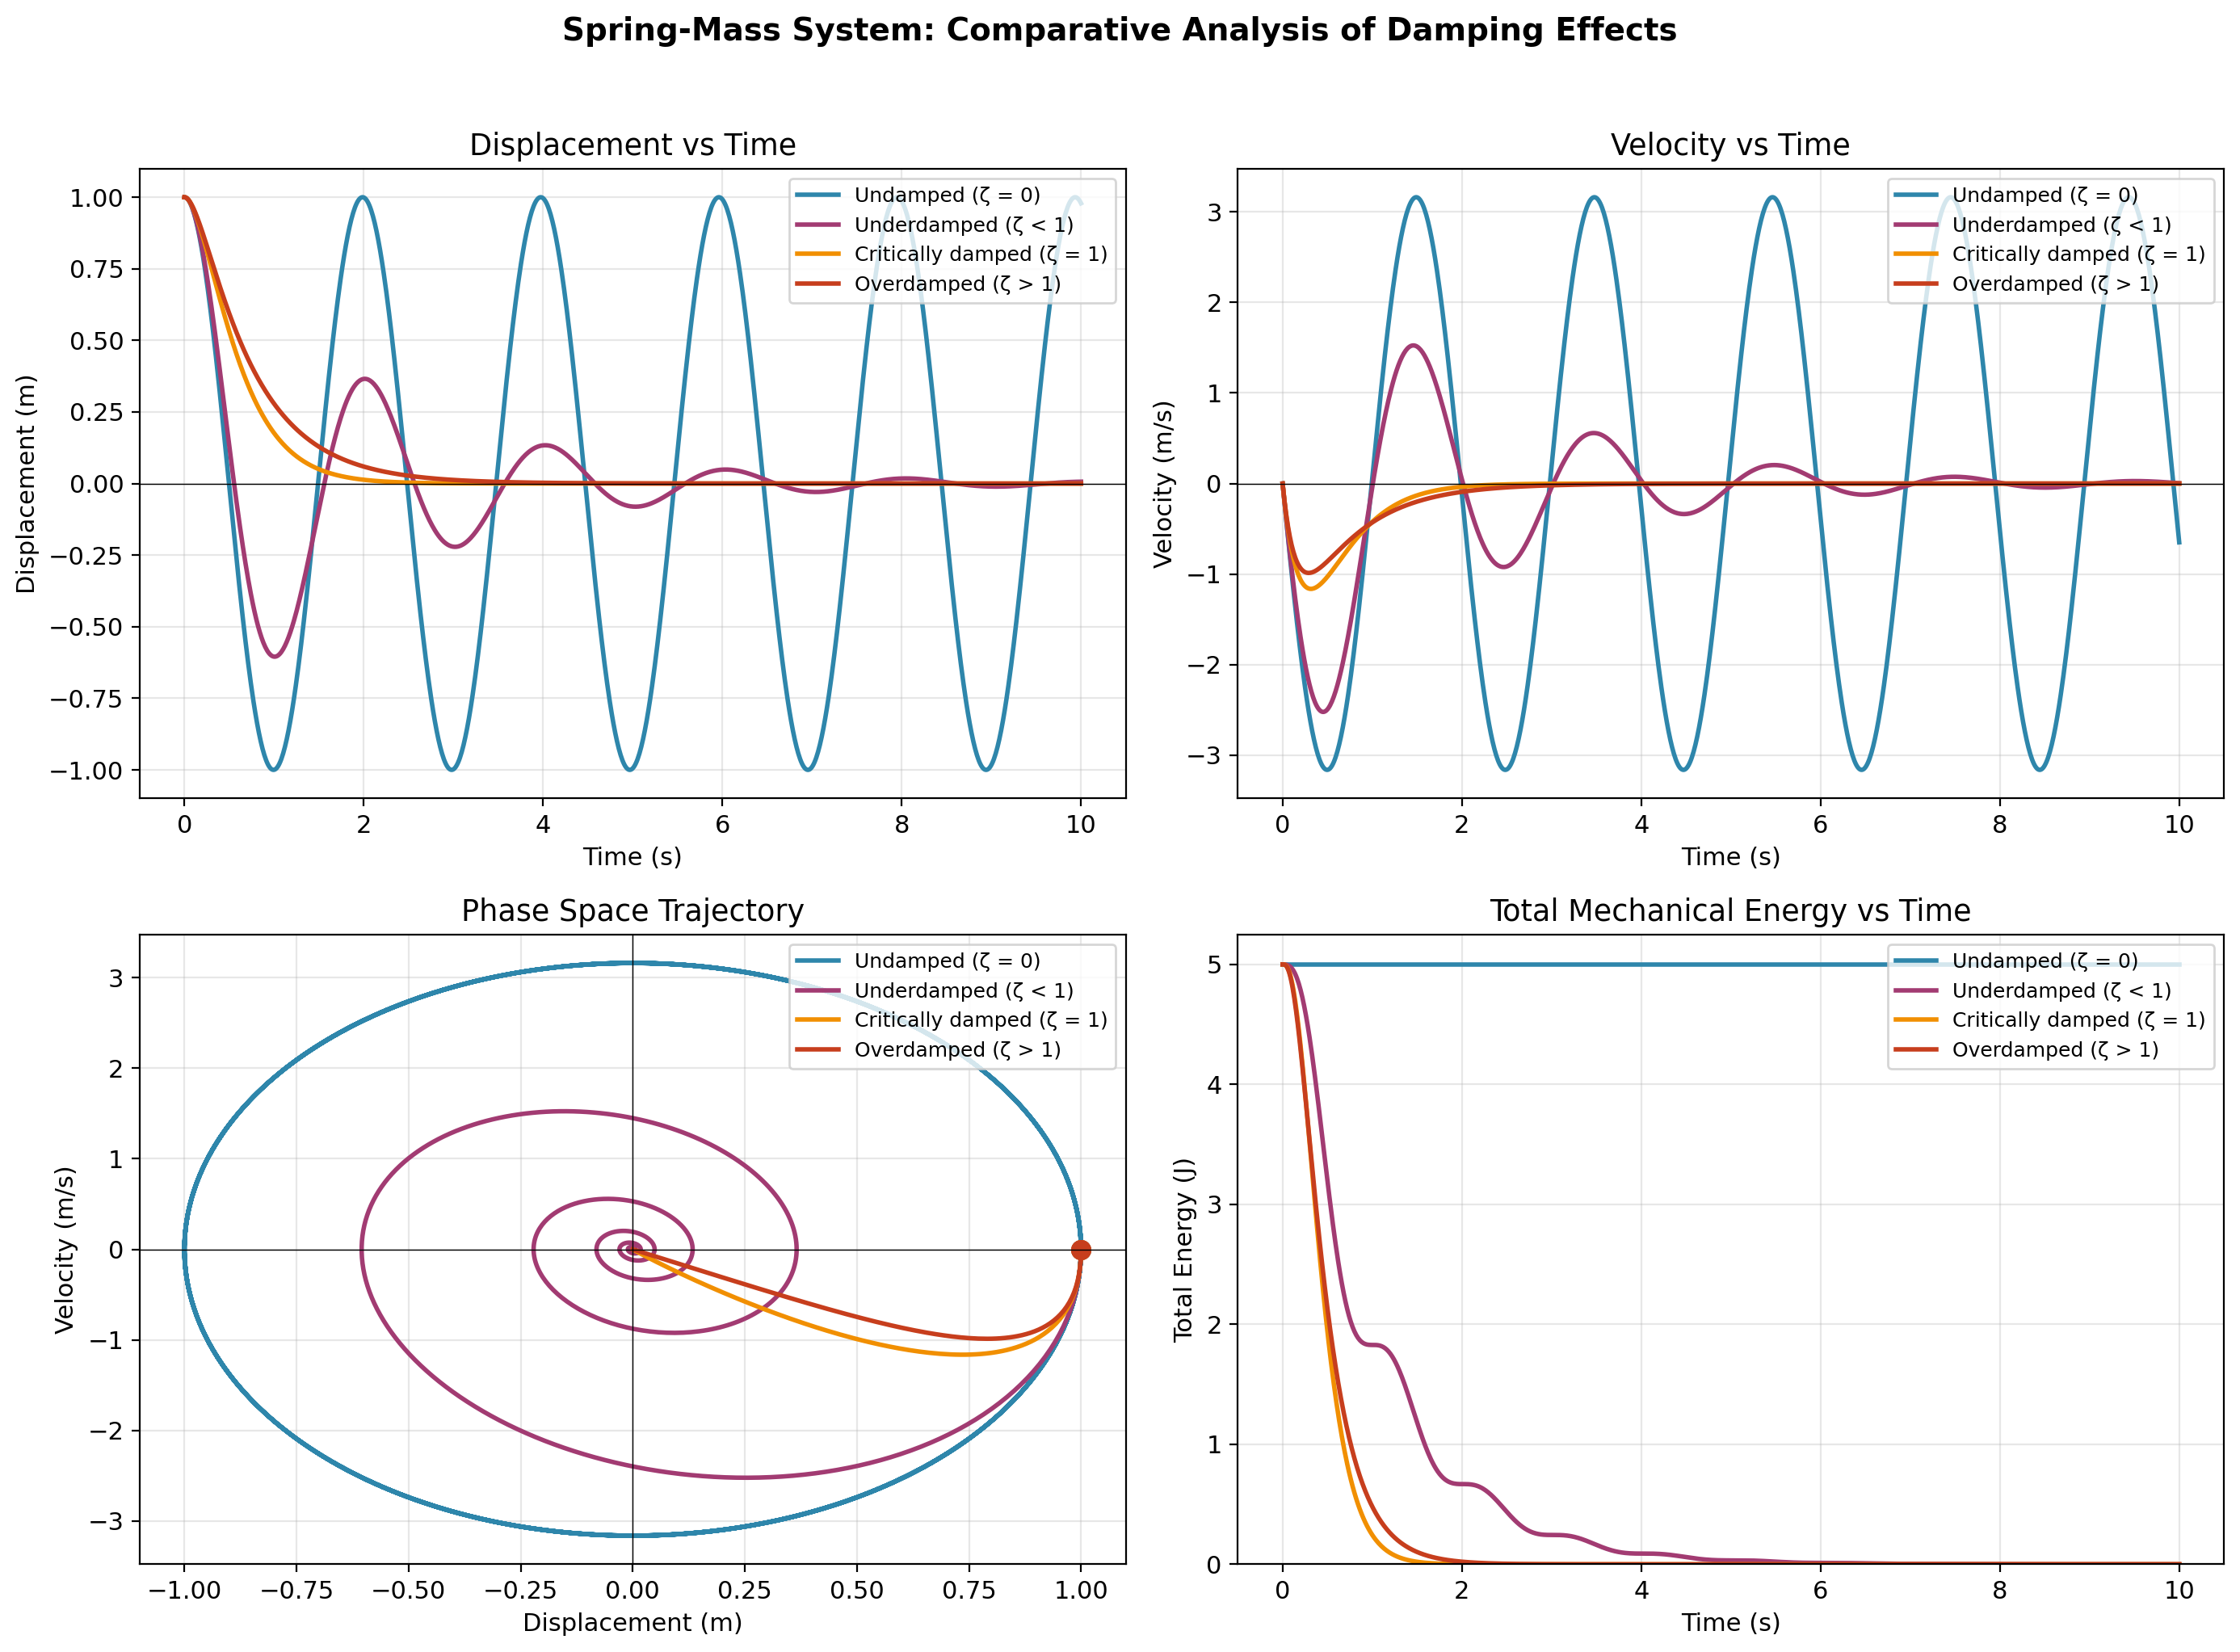


Plot saved to 'plot.png'


In [5]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Displacement vs Time
ax1 = axes[0, 0]
for i, (sol, label, color) in enumerate(zip(solutions, labels, colors)):
    ax1.plot(t, sol[:, 0], label=label, color=color, linewidth=2)
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Displacement (m)')
ax1.set_title('Displacement vs Time')
ax1.legend(loc='upper right', fontsize=9)
ax1.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

# Plot 2: Velocity vs Time
ax2 = axes[0, 1]
for i, (sol, label, color) in enumerate(zip(solutions, labels, colors)):
    ax2.plot(t, sol[:, 1], label=label, color=color, linewidth=2)
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Velocity (m/s)')
ax2.set_title('Velocity vs Time')
ax2.legend(loc='upper right', fontsize=9)
ax2.axhline(y=0, color='k', linestyle='-', linewidth=0.5)

# Plot 3: Phase Space
ax3 = axes[1, 0]
for i, (sol, label, color) in enumerate(zip(solutions, labels, colors)):
    ax3.plot(sol[:, 0], sol[:, 1], label=label, color=color, linewidth=2)
    ax3.plot(sol[0, 0], sol[0, 1], 'o', color=color, markersize=8)  # Initial point
ax3.set_xlabel('Displacement (m)')
ax3.set_ylabel('Velocity (m/s)')
ax3.set_title('Phase Space Trajectory')
ax3.legend(loc='upper right', fontsize=9)
ax3.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
ax3.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

# Plot 4: Energy vs Time
ax4 = axes[1, 1]
for i, (sol, label, color) in enumerate(zip(solutions, labels, colors)):
    # Calculate total mechanical energy
    kinetic = 0.5 * m * sol[:, 1]**2
    potential = 0.5 * k * sol[:, 0]**2
    total_energy = kinetic + potential
    ax4.plot(t, total_energy, label=label, color=color, linewidth=2)
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Total Energy (J)')
ax4.set_title('Total Mechanical Energy vs Time')
ax4.legend(loc='upper right', fontsize=9)
ax4.set_ylim(bottom=0)

plt.suptitle('Spring-Mass System: Comparative Analysis of Damping Effects', 
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()

# Save the plot
plt.savefig('spring_mass_system_analysis.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

print("\nPlot saved to 'plot.png'")

## Analysis and Discussion

### Key Observations

1. **Undamped System (ζ = 0)**: The mass oscillates indefinitely with constant amplitude. The phase space trajectory is a perfect ellipse, and total energy remains constant.

2. **Underdamped System (ζ < 1)**: Oscillations occur but with exponentially decaying amplitude. The phase space trajectory spirals inward toward the origin. This is the most common behavior in physical systems.

3. **Critically Damped System (ζ = 1)**: The system returns to equilibrium in the shortest time without oscillating. This is the optimal damping for applications like door closers and shock absorbers.

4. **Overdamped System (ζ > 1)**: The system returns to equilibrium slowly without oscillating. The response is sluggish compared to critical damping.

### Physical Applications

- **Automotive suspensions**: Designed for slightly underdamped response for comfort
- **Seismometers**: Use critical or near-critical damping for accurate measurements
- **Building structures**: Tuned mass dampers reduce oscillations in tall buildings
- **Electrical circuits**: RLC circuits exhibit analogous behavior with resistance providing damping

In [6]:
# Calculate and display key metrics for the underdamped case
c_under = c_values[1]  # Underdamped case
zeta_under = c_under / (2 * np.sqrt(k * m))
gamma = c_under / (2 * m)
omega_d = np.sqrt(omega_0**2 - gamma**2)

print("Underdamped System Analysis")
print("=" * 40)
print(f"Damping ratio: ζ = {zeta_under:.3f}")
print(f"Damping coefficient: γ = {gamma:.3f} s⁻¹")
print(f"Damped frequency: ωd = {omega_d:.3f} rad/s")
print(f"Damped period: Td = {2*np.pi/omega_d:.3f} s")
print(f"Time constant: τ = {1/gamma:.3f} s")
print(f"Q-factor: Q = {1/(2*zeta_under):.3f}")

Underdamped System Analysis
Damping ratio: ζ = 0.158
Damping coefficient: γ = 0.500 s⁻¹
Damped frequency: ωd = 3.122 rad/s
Damped period: Td = 2.012 s
Time constant: τ = 2.000 s
Q-factor: Q = 3.162


## Conclusion

This notebook has demonstrated the fundamental behavior of spring-mass systems under various damping conditions. The mathematical framework based on second-order differential equations provides a complete description of the system dynamics. Understanding these principles is essential for analyzing and designing mechanical systems, from simple vibration isolators to complex structural dynamics problems.

The numerical simulations confirm the theoretical predictions and illustrate how damping affects the system's transient response, energy dissipation, and phase space evolution.